In [7]:
import numpy as np
import matplotlib.pyplot as plt 
import os

from astropy.cosmology import FlatLambdaCDM
import GCR
import GCRCatalogs as GCRCat
import numpy as npO
import sys
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
import itertools
from itertools import permutations 
from itertools import product 
import bilby as bb


cosmo = FlatLambdaCDM(H0=70, Om0=0.283, Tcmb0=2.725)

plt.rcParams.update({

    # --- Figure Layout ---
    "figure.figsize": (6, 4),           # Default figure size in inches
    "figure.dpi": 150,                  # DPI for crisp rendering
    "savefig.dpi": 300,                 # Higher DPI for saved figures
    "figure.autolayout": True,          # Avoids label overlap

    # --- Font & Text ---
    "font.family": "monospace",             # Or "sans-serif" for modern look
    "font.serif": ["Terminal"],  # Matches many journals
    "font.size": 12,                    # Base font size
    "axes.titlesize": 14,               # Title font size
    "axes.labelsize": 13,               # Axis label size
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11,
    "mathtext.fontset": "dejavuserif",  # Matches the serif font

    # --- Line & Marker Styles ---
    "lines.linewidth": 1.8,
    "lines.markersize": 6,
    "lines.markeredgewidth": 0.7,

    # --- Axes ---
    "axes.linewidth": 1.0,              # Frame thickness
    "axes.labelpad": 6,                 # Padding between label and axis
    "axes.grid": True,
    "grid.alpha": 0.25,
    "grid.linestyle": "--",
    "grid.linewidth": 0.7,
    "axes.spines.top": False,           # Removes top spine
    "axes.spines.right": False,         # Removes right spine

    # --- Ticks ---
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 5,
    "ytick.major.size": 5,
    "xtick.minor.size": 3,
    "ytick.minor.size": 3,
    "xtick.top": False,
    "ytick.right": False,

    # --- Legend ---
    "legend.frameon": False,
    "legend.handlelength": 2,
    "legend.handletextpad": 0.4,
    "legend.loc": "best",

    # --- Colors and Colormaps ---
    "image.cmap": "viridis",            # Good perceptually uniform default
    "axes.prop_cycle": plt.cycler("color", [
        "#1f77b4", "#ff7f0e", "#2ca02c",
        "#d62728", "#9467bd", "#8c564b",
        "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"
    ]),
})

In [8]:
def LSST_mag_lim(C_m,m_sky,theta_eff,t_vis,k_m,X):
    '''
    C_m is the band dependent parameter
    m_sky is the sky brightness (AB mag arcsec−2)
    theta_eff is the seeing (in arcseconds)
    t_vis is the exposure time (seconds)
    k_m is the atmospheric extinction coefficient
    X is air mass
    '''
    return C_m + 0.5 * (m_sky-21) + 2.5*np.log10(0.7/theta_eff)+1.25*np.log10(t_vis/30)-k_m*(X-1)

def getLSSTBandParameters(band):
    # Band dict in the form of band: [C_m,m_sky,theta_eff,k_m]
    # From eq. 6 of Ivecic 2019
    bandDict = {"u":[23.09,22.99,0.92,0.491],
                "g":[24.42,22.26,0.87,0.213],
                "r":[24.44,21.20,0.83,0.126],
                "i":[24.32,20.48,0.80,0.096],
                "z":[24.16,19.60,0.78,0.069],
                "y":[23.73,18.61,0.76,0.170],
               }
    return bandDict[band.lower()]

In [3]:
visits_per_yr = np.array([56, 74, 184, 187, 166, 171])/10 # visits per year in u-g-r-i-z-y
expTimes = [38,30,30,30,30,30]
X = 1.3 # SDSS average, for reference
allBands = ["u","g","r","i","z","y"]

In [4]:
maglist = []
for y in np.arange(1,11):
    print(f"For year {y}")
    for b,v,expTime in zip(allBands,visits_per_yr,expTimes):
        C_m,m_sky,theta_eff,k_m = getLSSTBandParameters(b)
        mag = LSST_mag_lim(C_m,m_sky,theta_eff,y*expTime*v,k_m,X)
        print(f"{b}: {mag:.2f}")
        maglist.append(mag)
    print()
maglist = np.reshape(maglist,(10,6))

For year 1
u: 24.70
g: 25.84
r: 25.90
i: 25.48
z: 24.85
y: 23.94

For year 2
u: 25.08
g: 26.21
r: 26.27
i: 25.85
z: 25.22
y: 24.31

For year 3
u: 25.30
g: 26.43
r: 26.49
i: 26.07
z: 25.44
y: 24.53

For year 4
u: 25.46
g: 26.59
r: 26.65
i: 26.23
z: 25.60
y: 24.69

For year 5
u: 25.58
g: 26.71
r: 26.77
i: 26.35
z: 25.72
y: 24.81

For year 6
u: 25.68
g: 26.81
r: 26.87
i: 26.45
z: 25.82
y: 24.91

For year 7
u: 25.76
g: 26.89
r: 26.95
i: 26.53
z: 25.90
y: 24.99

For year 8
u: 25.83
g: 26.97
r: 27.03
i: 26.60
z: 25.98
y: 25.06

For year 9
u: 25.90
g: 27.03
r: 27.09
i: 26.67
z: 26.04
y: 25.13

For year 10
u: 25.95
g: 27.09
r: 27.15
i: 26.73
z: 26.10
y: 25.19



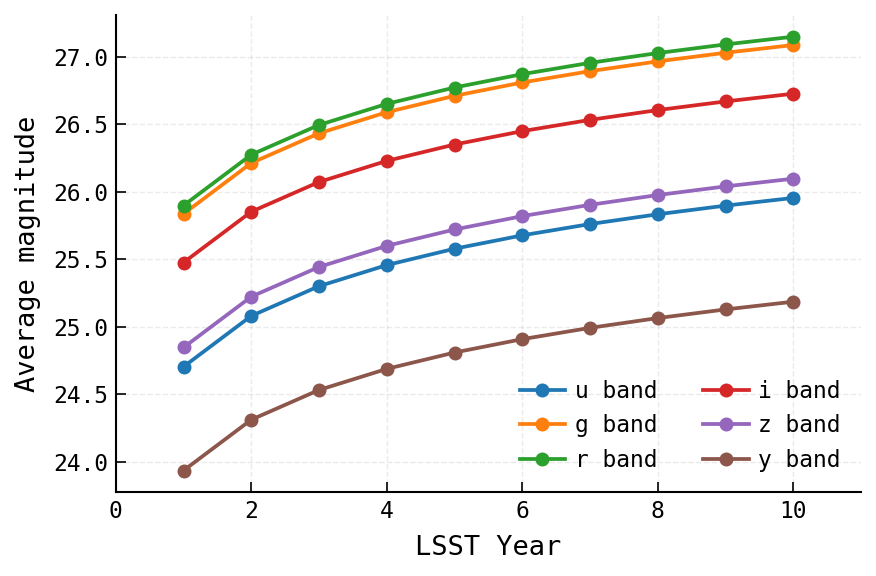

In [5]:
for b,mags in zip(allBands,maglist.T):
    plt.plot(np.arange(1,11),mags,"-o",label=f"{b} band")
plt.xlabel("LSST Year")
plt.ylabel("Average magnitude")
plt.xlim(0,11)
plt.legend(ncols=2)
plt.tight_layout()
plt.show()

## Host Probability

Here, we want to take a redshift limit, in the z-L plane, and draw randomly from all galaxies that are brighter AND within the aforementioned redshift range

# SkySim5000

In [11]:
for ent in GCRCat.get_available_catalog_names():
    if ent.startswith("skysim"):
        print(ent)

skysim5000_v1.1.1
skysim5000_v1.1.1_redmagic_v0.8.5_highdens
skysim5000_v1.1.1_redmagic_v0.8.5_highlum
skysim5000_v1.1.1_redmapper_v0.8.5
skysim5000_v1.1.2
skysim5000_v1.2


In [12]:
import pandas as pd

cat_name2 = "skysim5000_v1.2_small"
skysimCat = GCRCat.load_catalog(cat_name2)
# catz.shape

## Validate a schecter function across wide z for different LSST filters
- u-g-r-i-z-Y
- from z=0 to z=3, in bins of z=0.5 width
- semilogy plot, x axis showing absolute mag in a certain band, y axis showing log luminosity function (i.e., number of galaxies in that luminosity bin, renormalized to 1/Mpc^3)
- abs mag range - -22.5 to -15.5. step in steps of 0.2

In [8]:
myQuantitiesOfInterest = np.array(["redshift","redshiftHubble","galaxyID",
                                   "LSST_filters/magnitude:LSST_u:rest",
                                    "LSST_filters/magnitude:LSST_g:rest",
                                    "LSST_filters/magnitude:LSST_r:rest",
                                   "LSST_filters/magnitude:LSST_i:rest",
                                   "LSST_filters/magnitude:LSST_z:rest",
                                    "LSST_filters/magnitude:LSST_y:rest"])

In [ ]:
z_step = 0.5
delta_mag = 0.2
fig,axs = plt.subplots(6,6,figsize=(18,18),sharex=True)

rowIter=0

# allDataDict= {}

for z_lower in np.arange(0,3,step=z_step):
    # %%time
    data = pd.DataFrame(skysimCat.get_quantities(list(myQuantitiesOfInterest),filters=(f"redshift>{z_lower}",f"redshift<{z_lower+z_step}","is_central==True")))
    colIter=0
    for columnName in ["LSST_filters/magnitude:LSST_u:rest",
                           "LSST_filters/magnitude:LSST_g:rest",
                           "LSST_filters/magnitude:LSST_r:rest",
                           "LSST_filters/magnitude:LSST_i:rest",
                           "LSST_filters/magnitude:LSST_z:rest",
                           "LSST_filters/magnitude:LSST_y:rest"]:

        band = columnName.split(":")[-2][-1]
        
        ax = axs[rowIter,colIter]
        
        bin_num = {}
        for mag_low in np.arange(-22.5,-15.4,step=delta_mag):
            bin_num[mag_low+delta_mag/2] = len(data[np.logical_and(data[columnName]>mag_low, data[columnName]>mag_low+delta_mag)])

        # allDataDict[z_lower] = dict(band,bin_num)
        
        k,v = bin_num.keys(),bin_num.values()
        
        ax.plot(k,v,"-o")
        ax.semilogy()
        ax.xaxis.set_inverted(True)

        colIter+=1
    rowIter+=1

    ax.text(0.8, 0.6, f'{z_lower}<z<{z_lower+z_step}',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)

for a,band in zip(axs[-1,:],["u","g","r","i","z","Y"]):
    a.set_xlabel("$M_{}$".format(band))

for a in axs[:,0]:
    a.set_ylabel("$N_{gals}$")

for a in axs.flatten():
    a.grid(ls='--',which='major')
    a.grid(ls='-.',which='minor',alpha=0.3)

fig.tight_layout()
fig.savefig(os.path.join(os.getcwd(),"SkySimSchecter.jpg"),dpi=200)
plt.show()

In [9]:
%%time
myQuantitiesOfInterest = np.array(["redshift","redshiftHubble","galaxyID",
                                   "LSST_filters/magnitude:LSST_u:rest",
                                    "LSST_filters/magnitude:LSST_g:rest",
                                    "LSST_filters/magnitude:LSST_r:rest",
                                   "LSST_filters/magnitude:LSST_i:rest",
                                   "LSST_filters/magnitude:LSST_z:rest",
                                    "LSST_filters/magnitude:LSST_y:rest",
                                  "stellar_mass","halo_mass","is_central"])
data = pd.DataFrame(skysimCat.get_quantities(list(myQuantitiesOfInterest)))

CPU times: user 3.69 s, sys: 19.2 s, total: 22.9 s
Wall time: 32.7 s


In [10]:
data

,is_central,LSST_filters/magnitude:LSST_z:rest,LSST_filters/magnitude:LSST_y:rest,LSST_filters/magnitude:LSST_u:rest,redshiftHubble,LSST_filters/magnitude:LSST_r:rest,LSST_filters/magnitude:LSST_g:rest,redshift,halo_mass,galaxyID,stellar_mass,LSST_filters/magnitude:LSST_i:rest
0,True,-19.720839,-19.774324,-18.130419,0.021528,-19.490667,-19.170687,0.022012,2.472611e+11,10070000000000,3.843968e+09,-19.641598
1,True,-16.384882,-16.442663,-14.983802,0.020944,-16.130363,-15.799252,0.020724,5.465768e+10,10070000000001,4.857164e+07,-16.299818
2,True,-19.957903,-20.023260,-18.356327,0.020528,-19.664007,-19.306858,0.020922,3.487682e+11,10070000000002,4.128166e+09,-19.851128
3,True,-16.854864,-16.926462,-15.005349,0.017873,-16.518398,-16.075336,0.018407,7.027417e+10,10070000000003,5.973682e+07,-16.736721
4,True,-17.590200,-17.655111,-16.253250,0.001106,-17.320200,-17.022739,0.000889,8.068516e+10,10070000000004,1.942851e+08,-17.488804
...,...,...,...,...,...,...,...,...,...,...,...,...
93947746,True,-18.710220,-18.748577,-17.562988,3.026532,-18.602928,-18.458942,3.028287,4.476727e+10,9943200191150,9.498182e+07,-18.674686
93947747,True,-19.215153,-19.249542,-18.306728,3.012949,-19.150379,-19.071177,3.012375,5.842828e+10,9943200191151,1.423304e+08,-19.191593
93947748,True,-18.781633,-18.812241,-17.951912,3.013216,-18.704712,-18.618912,3.012953,1.106196e+10,9943200191152,7.870476e+06,-18.753759
93947749,True,-17.140089,-17.154819,-16.476864,2.967263,-17.130688,-17.100580,2.965215,1.303879e+10,9943200191153,7.911783e+06,-17.144182


<>:8: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_1215092/107138587.py:8: SyntaxWarning: invalid escape sequence '\o'
  ax.set_xlabel("$log(M_{\odot})$")


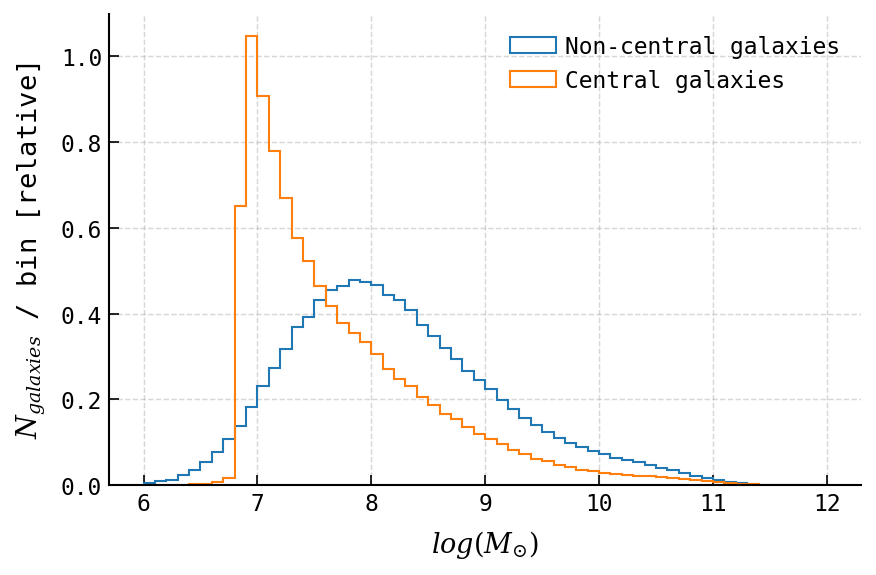

In [11]:
msk = data["is_central"]==False

fig,ax = plt.subplots()

ax.hist(np.log10(data["stellar_mass"][msk]),bins=np.arange(6,12.1,step=0.1),histtype='step',label="Non-central galaxies",density=True)
ax.hist(np.log10(data["stellar_mass"][~msk]),bins=np.arange(6,12.1,step=0.1),histtype='step',label="Central galaxies",density=True)

ax.set_xlabel("$log(M_{\odot})$")
ax.set_ylabel("$N_{galaxies}$ / bin [relative]")
ax.grid(alpha=0.5)
ax.legend()

<>:14: SyntaxWarning: invalid escape sequence '\o'
<>:14: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_1215092/1072552874.py:14: SyntaxWarning: invalid escape sequence '\o'
  axs[0].set_ylabel("$log(M_\odot)$")


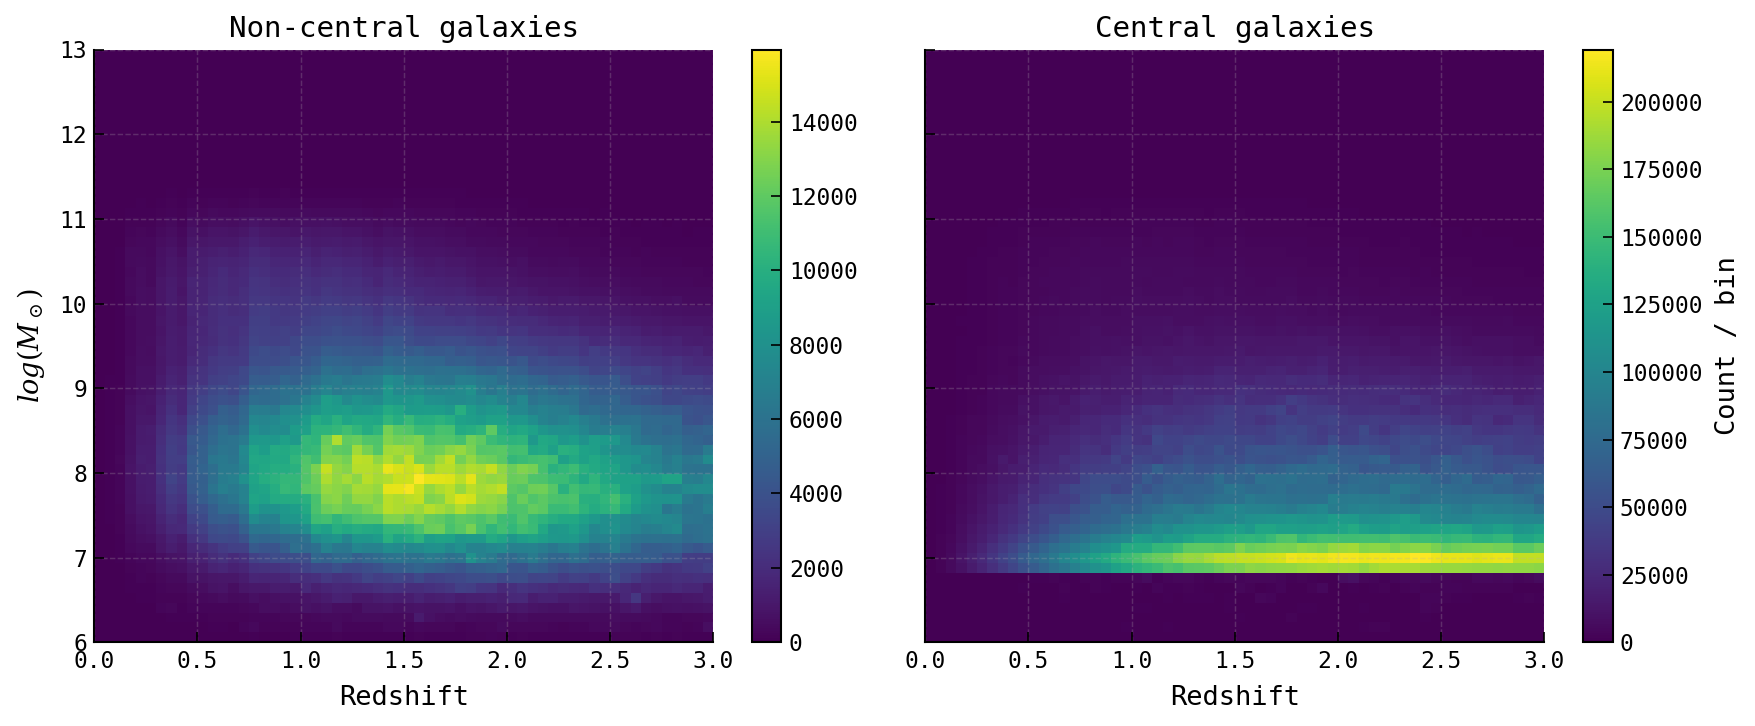

In [12]:
fig,axs = plt.subplots(1,2,figsize=(12,5),sharey=True)

for ax,mask,lbl in zip(axs.flatten(),[msk,~msk],["Non-central","Central"]):
    cc = ax.hist2d(data["redshift"][mask],np.log10(data["stellar_mass"][mask]),bins=[60,60],range=[[0,3],[6,13]])

    if ax==axs.flatten()[0]:
        fig.colorbar(cc[3], ax=ax)
    else:
        fig.colorbar(cc[3], ax=ax,label="Count / bin")
        
    ax.set_title(f"{lbl} galaxies")
    ax.set_xlabel("Redshift")
    
axs[0].set_ylabel("$log(M_\odot)$")
fig.tight_layout()

## Parent catalogs to generate
- Unaltered

In [15]:
myQuantitiesOfInterest = np.array(["ra","dec","redshift","redshiftHubble","galaxyID",
                                    "LSST_filters/magnitude:LSST_g:rest",
                                    "LSST_filters/magnitude:LSST_g:rest",
                                    "totalMassStellar","stellar_mass","is_central"])

In [16]:
%%time
data = pd.DataFrame(skysimCat.get_quantities(list(myQuantitiesOfInterest),))

CPU times: user 2.88 s, sys: 13.2 s, total: 16.1 s
Wall time: 27.1 s


## Weights to assign
- $L$
- $M_{star}$
- Uniform

In [17]:
del data

In [13]:
%%time 
myQuantitiesOfInterest = np.array(["redshift","redshiftHubble","galaxyID",
                                   "LSST_filters/magnitude:LSST_u:rest",
                                    "LSST_filters/magnitude:LSST_g:rest",
                                    "LSST_filters/magnitude:LSST_r:rest",
                                   "LSST_filters/magnitude:LSST_i:rest",
                                   "LSST_filters/magnitude:LSST_z:rest",
                                    "LSST_filters/magnitude:LSST_y:rest",
                                   "LSST_filters/totalLuminositiesStellar:LSST_u:rest",
                                    "LSST_filters/totalLuminositiesStellar:LSST_g:rest",
                                    "LSST_filters/totalLuminositiesStellar:LSST_r:rest",
                                   "LSST_filters/totalLuminositiesStellar:LSST_i:rest",
                                   "LSST_filters/totalLuminositiesStellar:LSST_z:rest",
                                    "LSST_filters/totalLuminositiesStellar:LSST_y:rest",
                                  "stellar_mass","halo_mass","is_central"])
data = pd.DataFrame(skysimCat.get_quantities(list(myQuantitiesOfInterest)))
msk = data["is_central"]==False

CPU times: user 4.58 s, sys: 23.6 s, total: 28.2 s
Wall time: 44.2 s


In [14]:
for band in ["u","g","r","i","z","y"]:
    meanL = np.mean(data["LSST_filters/totalLuminositiesStellar:LSST_{}:rest".format(band)])
    data["weight_L_{}".format(band)] = data["LSST_filters/totalLuminositiesStellar:LSST_{}:rest".format(band)]/meanL
    data["weight_logL_{}".format(band)] = np.log10(data["LSST_filters/totalLuminositiesStellar:LSST_{}:rest".format(band)])/np.log10(meanL)
data["weight_M"] = data["stellar_mass"]/np.median(data["stellar_mass"])
data["weight_logM"] = np.log10(data["stellar_mass"])/np.log10(np.median(data["stellar_mass"]))

In [15]:
for band in ["u","g","r","i","z","y"]:
    print(f"L_{band}: {np.nanpercentile(data["LSST_filters/totalLuminositiesStellar:LSST_{}:rest".format(band)],(1,99))}")
    print(f"weight L_{band}: {np.nanpercentile(data["weight_L_{}".format(band)],(1,99))}")
    print(f"weight logL_{band}: {np.nanpercentile(data["weight_logL_{}".format(band)],(1,99))}")

L_u: [6.76788250e+05 2.35755032e+08]
weight L_u: [ 0.03130026 10.90325351]
weight logL_u: [0.79489144 1.14145469]
L_g: [1.63597088e+06 5.29815712e+08]
weight L_g: [ 0.03727147 12.07051523]
weight logL_g: [0.81306613 1.14154274]
L_r: [2.17142912e+06 7.13368064e+08]
weight L_r: [ 0.04040522 13.27411056]
weight logL_r: [0.81972742 1.14527305]
L_i: [2.46348600e+06 8.42480032e+08]
weight L_i: [ 0.04085978 13.97351203]
weight logL_i: [0.82150919 1.14720672]
L_z: [2.5888470e+06 9.5132848e+08]
weight L_z: [ 0.03969118 14.58539232]
weight logL_z: [0.82067671 1.14894504]
L_y: [2.67998962e+06 1.04225251e+09]
weight L_y: [ 0.03859219 15.00856681]
weight logL_y: [0.8197441 1.150012 ]


Text(0.5, 0, 'Luminosity weight in band')

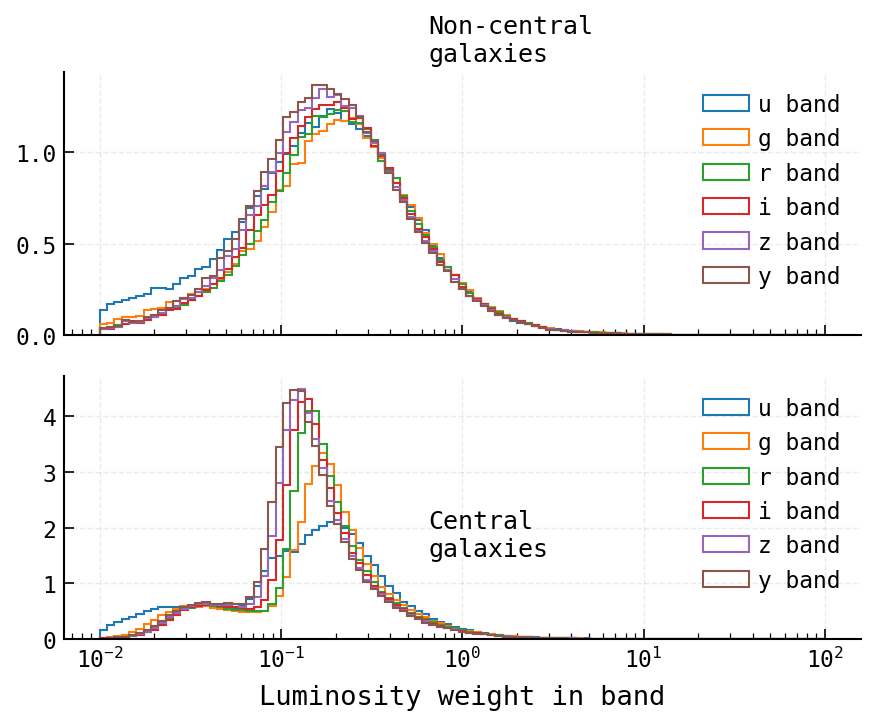

In [16]:
fig,axs = plt.subplots(2,1,figsize = (6,5),sharex=True)

for ax,mask,lbl in zip(axs.flatten(),[msk,~msk],["Non-central","Central"]):
    for band in ["u","g","r","i","z","y"]:
        ax.hist(data["weight_L_{}".format(band)][mask],label="{} band".format(band),histtype="step",bins=np.logspace(-2,2,num=100),density=True)
    ax.legend()
    ax.text(0.65,1.5,f"{lbl}\ngalaxies")
    ax.semilogx()
ax.set_xlabel("Luminosity weight in band")

Text(0.5, 0, 'Log-Luminosity weight in band')

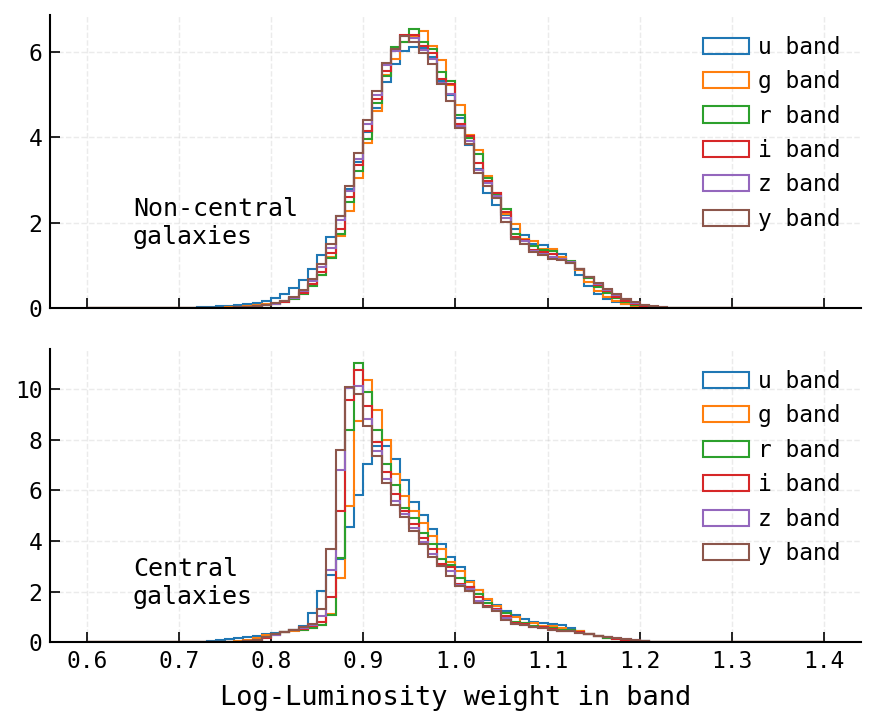

In [17]:
fig,axs = plt.subplots(2,1,figsize = (6,5),sharex=True)

for ax,mask,lbl in zip(axs.flatten(),[msk,~msk],["Non-central","Central"]):
    for band in ["u","g","r","i","z","y"]:
        ax.hist(data["weight_logL_{}".format(band)][mask],label="{} band".format(band),histtype="step",bins=np.arange(0.6,1.41,step=0.01),density=True)
    ax.legend()
    ax.text(0.65,1.5,f"{lbl}\ngalaxies")
ax.set_xlabel("Log-Luminosity weight in band")

Text(0.5, 0, 'Stellar mass weight in band')

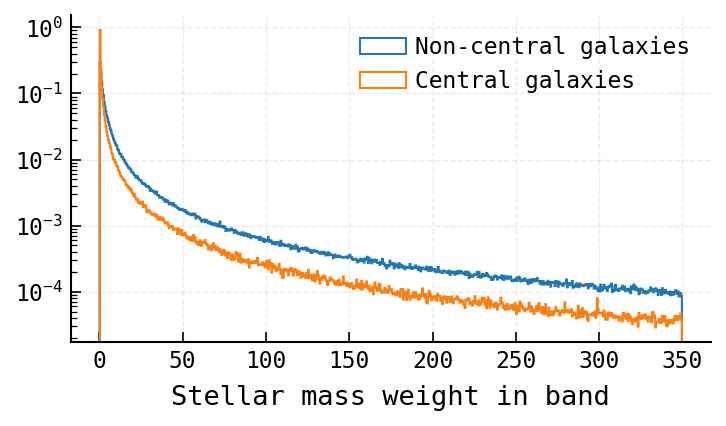

In [18]:
fig,ax = plt.subplots(figsize = (5,3))

for mask,lbl in zip([msk,~msk],["Non-central","Central"]):
    ax.hist(data["weight_M"][mask],label=f"{lbl} galaxies",histtype="step",bins=np.arange(0.2,350,step=0.5),density=True,log=True)
ax.legend()
ax.set_xlabel("Stellar mass weight in band")

In [14]:
del fig

# Recreate P(z) plots, this time separated by central/non-central

## draw 1M samples for each catalog

In [ ]:
data.columns.values

#### The above histograms show that the only band that might have a different weight distribution. Therefore, I will drop all bands except u band, and one of g-r-i-z-y. I have chosen to keep r band here

In [ ]:
for band in ["r","i","z","y"]:
    try:
        data.drop("LSST_filters/magnitude:LSST_{}:rest".format(band),inplace=True,axis=1)
        data.drop("weight_L_{}".format(band),inplace=True,axis=1)
        data.drop("weight_logL_{}".format(band),inplace=True,axis=1)
    except:
        continue

In [ ]:
data.columns.values

In [19]:
weights = ["weight_L","weight_logL","weight_M","weight_logM"]
# weights = ["weight_L","weight_M","weight_logM"]
remaining_bands = ["u","r","y"]
df_dict = {}

In [20]:
%%time 
# np.random.seed(1503170817)
n_merges = int(1E6) # Updated now to 1E7
# Getting indexes based on p_host
events_index_uniform = np.random.choice(data.index, 
                                size=n_merges, 
                                # p=phost.values
                                       )

df_dict["Uniform"]=data.iloc[events_index_uniform]

# Now we do the different weights

# Getting indexes based on p_host
for weight in weights:
    if (weight!="weight_L" and weight!="weight_logL"):
        events_index = np.random.choice(data.index, 
                                        size=n_merges, 
                                        p=data[weight]/np.sum(data[weight])
                                               )
        df_dict[weight] = data.iloc[events_index]
    else:
        for band in remaining_bands:
            newWeight=weight+"_"+band
            events_index = np.random.choice(data.index, 
                                            size=n_merges, 
                                            p=data[newWeight]/np.sum(data[newWeight])
                                                   )
            df_dict[newWeight] = data.iloc[events_index]

CPU times: user 26.8 s, sys: 17 s, total: 43.8 s
Wall time: 44.8 s


In [23]:
df_dict.keys()

dict_keys(['Uniform', 'weight_L_u', 'weight_L_r', 'weight_L_y', 'weight_logL_u', 'weight_logL_r', 'weight_logL_y', 'weight_M', 'weight_logM'])

In [ ]:
del data

In [ ]:
colors=[
    "#0085ad",
"#af272f",
"#4c8c2b",
"#eaaa00",
"#522506",
"#e9724d",
"#79ccb3"]

## P(z), before any SNR cut

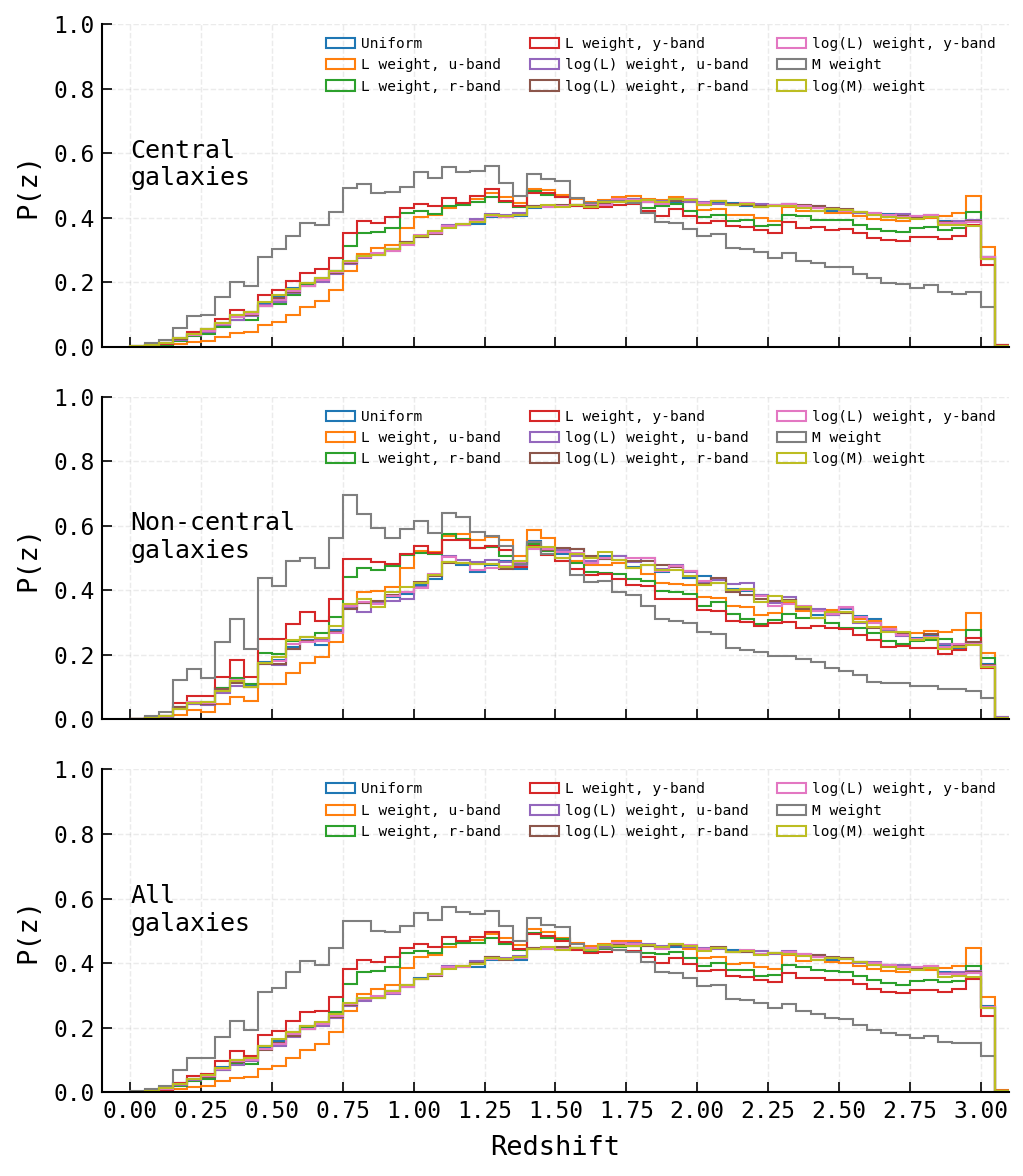

In [32]:
fig,axs = plt.subplots(3,1,figsize=[7,8],sharex=True,sharey=True)

for val,key in zip(df_dict.values(),["Uniform","L weight, u-band","L weight, r-band","L weight, y-band",
                                     "log(L) weight, u-band","log(L) weight, r-band","log(L) weight, y-band",
                                     "M weight","log(M) weight"]):
    mask = val["is_central"]==True # Mask all central galaxies
    axs[0].hist(val[mask]["redshift"],bins=np.arange(0,3.11,step=0.05),label=key,histtype='step',density=True)
    axs[1].hist(val[~mask]["redshift"],bins=np.arange(0,3.11,step=0.05),label=key,histtype='step',density=True)
    axs[2].hist(val["redshift"],bins=np.arange(0,3.11,step=0.05),label=key,histtype='step',density=True)
for ax in axs:
    ax.grid(ls='--')
    ax.set_ylabel("P(z)")
    ax.set_xticks(np.arange(0,3.1,step=0.25))
    ax.legend(fontsize='xx-small',ncols=3)
    ax.set_xlim(-0.1,3.1)
    ax.set_ylim(0,1)
axs[-1].set_xlabel("Redshift")
axs[0].text(0,0.5,"Central\ngalaxies")
axs[1].text(0,0.5,"Non-central\ngalaxies")
axs[2].text(0,0.5,"All\ngalaxies")
fig.tight_layout()
fig.savefig(os.path.join(os.getcwd(),"UniformParent_P_z_differentWeights.jpg"),dpi=200)

# Given the results above, create five CBC catalogs...
- Use the uniform parent catalog
- Draw 10M CBC's
- Weighted by stellar mass, $L_{u,r,y}$, and uniform weights

In [34]:
del fig,data,df_dict

In [35]:
allQuantitiesOfInterest = ["ra","ra_true","dec","dec_true","redshift","redshiftHubble","galaxyID",
                        "stellar_mass","isCentral",
                          "LSST_filters/totalLuminositiesStellar:LSST_u:rest",
                                    "LSST_filters/totalLuminositiesStellar:LSST_y:rest",
                                    "LSST_filters/totalLuminositiesStellar:LSST_r:rest",]

In [36]:
%%time
data = pd.DataFrame(skysimCat.get_quantities(allQuantitiesOfInterest,))

CPU times: user 4.18 s, sys: 19.2 s, total: 23.4 s
Wall time: 1min 19s


In [37]:
data.index

RangeIndex(start=0, stop=93947751, step=1)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93947751 entries, 0 to 93947750
Data columns (total 12 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   dec_true                                           float64
 1   redshiftHubble                                     float64
 2   dec                                                float64
 3   galaxyID                                           int64  
 4   stellar_mass                                       float32
 5   LSST_filters/totalLuminositiesStellar:LSST_r:rest  float32
 6   LSST_filters/totalLuminositiesStellar:LSST_u:rest  float32
 7   ra_true                                            float64
 8   redshift                                           float64
 9   ra                                                 float64
 10  isCentral                                          bool   
 11  LSST_filters/totalLuminositiesStellar:LSST_y:res

#### Set P_host

In [49]:
%%time 
data["weight_mass"] = data["stellar_mass"] / np.sum(data["stellar_mass"])
data["weight_u"] = data["LSST_filters/totalLuminositiesStellar:LSST_u:rest"] / sum(data["LSST_filters/totalLuminositiesStellar:LSST_u:rest"])
data["weight_r"] = data["LSST_filters/totalLuminositiesStellar:LSST_r:rest"] / sum(data["LSST_filters/totalLuminositiesStellar:LSST_r:rest"])
data["weight_y"] = data["LSST_filters/totalLuminositiesStellar:LSST_y:rest"] / sum(data["LSST_filters/totalLuminositiesStellar:LSST_y:rest"])

CPU times: user 14.2 s, sys: 2.66 s, total: 16.9 s
Wall time: 16.9 s


In [50]:
np.sum(data['weight_u']),np.sum(data['weight_r']),np.sum(data['weight_y'])

(np.float64(1.0), np.float64(1.0), np.float64(0.9999999999999999))

In [51]:
def stretch(ra_in,dec_in,ra_range=(60.46709862957921, 70.3338108507918),dec_range=(-46.57034567653332, -32.79850657784978)):
    delta_ra = ra_in - ra_range[0]
    delta_dec = dec_in - dec_range[0]

    stretched_ra = (1000*360 * (delta_ra / (ra_range[1]-ra_range[0])))%360
    stretched_dec = (1000*180 * (delta_dec / (dec_range[1]-dec_range[0])))%180 - 90

    return stretched_ra,stretched_dec

#### Creating a list of mergers

In [ ]:
%%time 
# np.random.seed(1503170817)
n_merges = 10000000 # Updated now to 1E7

# Uniform weights
events_index_uniform = np.random.choice(data.index, 
                                size=n_merges, 
                                )

# Getting indexes based on mass weight
events_index_massWeight = np.random.choice(data.index, 
                                size=n_merges, 
                                p=data["weight_mass"])

In [52]:
# Getting indexes based on mass weight
events_index_u = np.random.choice(data.index, 
                                size=n_merges, 
                                p=data["weight_u"])

# Getting indexes based on mass weight
events_index_r = np.random.choice(data.index, 
                                size=n_merges, 
                                p=data["weight_r"])

# Getting indexes based on mass weight
events_index_y = np.random.choice(data.index, 
                                size=n_merges, 
                                p=data["weight_y"])

In [ ]:
events_index.shape
cat_cbc_uniform = data.iloc[events_index_uniform]
cat_cbc_massWeight = data.iloc[events_index_massWeight]

In [53]:
cat_cbc_u = data.iloc[events_index_u]
cat_cbc_r = data.iloc[events_index_r]
cat_cbc_y = data.iloc[events_index_y]

In [ ]:
data.shape, cat_cbc_uniform.shape, cat_cbc_massWeight.shape

In [54]:
cat_cbc_u.shape, cat_cbc_r.shape, cat_cbc_y.shape

((1000000, 16), (1000000, 16), (1000000, 16))

In [ ]:
cat_cbc

In [ ]:
cat_cbc_uniform.galaxyID.value_counts()

In [ ]:
cat_cbc_massWeight.galaxyID.value_counts()

In [55]:
cat_cbc_u.galaxyID.value_counts(), cat_cbc_r.galaxyID.value_counts(), cat_cbc_y.galaxyID.value_counts()

(galaxyID
 10450000592006    5
 10199201867184    5
 10199202136757    5
 9814101572454     5
 10199101197242    5
                  ..
 10200201705877    1
 9559100915509     1
 10200000567655    1
 10199100707708    1
 9816100416191     1
 Name: count, Length: 969205, dtype: int64,
 galaxyID
 10070000540810    6
 10072000534156    5
 10450000352203    5
 10071000787194    5
 10072101996842    5
                  ..
 10327201382579    1
 10327201048011    1
 10326101350428    1
 10070201930526    1
 10071100516190    1
 Name: count, Length: 959865, dtype: int64,
 galaxyID
 9687000177744     7
 10071101390991    6
 10200000507567    6
 10450000401702    6
 9943000488417     5
                  ..
 10070100952772    1
 10450000765136    1
 9942000380836     1
 10450101488165    1
 10071202349242    1
 Name: count, Length: 949469, dtype: int64)

In [57]:
%%time 

catmock_uniform = cat_cbc_uniform.apply(lambda x: stretch(x['ra'], x['dec']), result_type='expand', axis=1)
catmock_uniform = catmock_uniform.rename(columns={0:'mra', 1: 'mdec'}, )

catmock_massWeight = cat_cbc_massWeight.apply(lambda x: stretch(x['ra'], x['dec']), result_type='expand', axis=1)
catmock_massWeight = catmock_massWeight.rename(columns={0:'mra', 1: 'mdec'}, )

catmock_u = cat_cbc_u.apply(lambda x: stretch(x['ra'], x['dec']), result_type='expand', axis=1)
catmock_u = catmock_u.rename(columns={0:'mra', 1: 'mdec'}, )

catmock_r = cat_cbc_r.apply(lambda x: stretch(x['ra'], x['dec']), result_type='expand', axis=1)
catmock_r = catmock_r.rename(columns={0:'mra', 1: 'mdec'}, )

catmock_y = cat_cbc_y.apply(lambda x: stretch(x['ra'], x['dec']), result_type='expand', axis=1)
catmock_y = catmock_y.rename(columns={0:'mra', 1: 'mdec'}, )

CPU times: user 44.3 s, sys: 2.64 s, total: 47 s
Wall time: 48.2 s


In [ ]:
catmock_uniform

In [ ]:
catmock_massWeight

In [58]:
# cat_cbc_uniform[["mra","mdec"]] = catmock_uniform[['mra', 'mdec']]
# cat_cbc_massWeight[["mra","mdec"]] = catmock_massWeight[['mra', 'mdec']]
cat_cbc_u[["mra","mdec"]] = catmock_u[['mra', 'mdec']]
cat_cbc_r[["mra","mdec"]] = catmock_r[['mra', 'mdec']]
cat_cbc_y[["mra","mdec"]] = catmock_y[['mra', 'mdec']]

/tmp/ipykernel_1341906/1574610954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_cbc_u[["mra","mdec"]] = catmock_u[['mra', 'mdec']]
/tmp/ipykernel_1341906/1574610954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_cbc_u[["mra","mdec"]] = catmock_u[['mra', 'mdec']]
/tmp/ipykernel_1341906/1574610954.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [ ]:
cat_cbc_uniform

In [ ]:
cat_cbc_massWeight

In [59]:
cat_cbc_u

,dec_true,redshiftHubble,dec,galaxyID,stellar_mass,LSST_filters/totalLuminositiesStellar:LSST_r:rest,LSST_filters/totalLuminositiesStellar:LSST_u:rest,ra_true,redshift,ra,isCentral,LSST_filters/totalLuminositiesStellar:LSST_y:rest,weight_mass,weight_u,weight_r,weight_y,mra,mdec
9285315,-35.706830,0.990978,-35.706830,9686000805412,6.479680e+08,69107408.0,14896124.0,64.189414,0.996574,64.189414,True,96498392.0,5.294465e-09,7.333006e-09,1.368768e-08,1.479108e-08,93.584165,57.775995
18728687,-40.062820,1.939916,-40.062820,10071100025753,1.308764e+10,388479072.0,160740480.0,65.855254,1.941005,65.855254,True,462793248.0,1.069374e-07,7.912870e-08,7.694369e-08,7.093604e-08,33.948629,4.331384
78860667,-35.887236,2.889525,-35.887236,9686200238749,1.326058e+09,334110240.0,152480544.0,63.371872,2.870858,63.371872,True,394724384.0,1.083506e-08,7.506253e-08,6.617518e-08,6.050257e-08,144.482970,39.846072
57307614,-41.113258,2.167560,-41.113258,10072201943035,4.773505e+08,73328936.0,49616296.0,67.724824,2.162075,67.724824,True,73972624.0,3.900371e-09,2.442492e-08,1.452382e-08,1.133838e-08,207.673035,-45.049236
71603547,-43.671563,2.997998,-43.671563,10327200022036,7.282640e+09,698484608.0,304668160.0,69.082693,3.002220,69.082693,True,839008384.0,5.950553e-08,1.499809e-07,1.383446e-07,1.286015e-07,71.321009,-2.479445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86852509,-36.737702,2.040926,-36.737702,9816202165065,1.226367e+09,74902584.0,62575964.0,68.407497,2.049393,68.407497,True,76135648.0,1.002049e-08,3.080465e-08,1.483550e-08,1.166992e-08,275.894174,84.119612
58246803,-40.163055,2.494358,-40.163055,10072201023999,1.198746e+10,554690880.0,128236912.0,68.400984,2.492166,68.400984,False,794256704.0,9.794799e-08,6.312797e-08,1.098643e-07,1.217421e-07,38.273022,-45.753137
63967454,-41.691656,2.913682,-41.691656,10199200242367,1.112108e+10,332369760.0,84495152.0,65.657992,2.903078,65.657992,True,440300576.0,9.086891e-08,4.159494e-08,6.583046e-08,6.748840e-08,36.583548,-44.801565
63995475,-41.011213,2.858965,-41.011213,10199200270388,7.427866e+06,59952108.0,36356132.0,66.772259,2.858781,66.772259,True,62640688.0,6.069215e-11,1.789726e-08,1.187435e-08,9.601441e-09,12.079427,28.691428


In [60]:
cat_cbc_r

,dec_true,redshiftHubble,dec,galaxyID,stellar_mass,LSST_filters/totalLuminositiesStellar:LSST_r:rest,LSST_filters/totalLuminositiesStellar:LSST_u:rest,ra_true,redshift,ra,isCentral,LSST_filters/totalLuminositiesStellar:LSST_y:rest,weight_mass,weight_u,weight_r,weight_y,mra,mdec
64708089,-42.012507,2.136921,-42.012507,10200201989205,6.753649e+07,2.463335e+07,10472877.0,69.621524,2.149613,69.621524,True,2.728664e+07,5.518321e-10,5.155547e-09,4.878978e-09,4.182443e-09,291.268724,81.638668
93265700,-39.690774,2.682523,-39.690774,9943200696083,9.509102e+06,6.938290e+06,2318119.0,66.301420,2.681817,66.301420,True,8.252409e+06,7.769767e-11,1.141155e-09,1.374225e-09,1.264913e-09,112.899107,7.036201
24750441,-42.435690,1.629307,-42.435690,10199100728342,1.578670e+11,1.408577e+09,276776992.0,65.534036,1.632886,65.534036,True,2.365509e+09,1.289911e-06,1.362507e-07,2.789882e-07,3.625806e-07,193.890447,-49.426793
54717330,-40.678384,2.056755,-40.678384,10071202221429,1.353267e+11,1.373722e+09,661756608.0,63.819248,2.054972,63.819248,True,1.783260e+09,1.105737e-06,3.257670e-07,2.720848e-07,2.733345e-07,267.599549,58.820896
85078460,-35.971555,2.350381,-35.971555,9815201381982,5.208870e+09,5.581955e+08,165082832.0,64.508900,2.351046,64.508900,True,7.578719e+08,4.256102e-08,8.126633e-08,1.105584e-07,1.161651e-07,230.462313,17.776576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56313798,-40.549383,2.765174,-40.549383,10071200397166,9.235610e+09,8.500922e+08,197535904.0,64.441292,2.747651,64.441292,False,1.267788e+09,7.546300e-08,9.724221e-08,1.683726e-07,1.943241e-07,283.691912,-55.121891
27556908,-42.225215,1.921565,-42.225215,10200100030761,1.891361e+07,1.102141e+07,5385921.5,69.898648,1.922265,69.898648,True,1.176562e+07,1.545407e-10,2.651360e-09,2.182944e-09,1.803411e-09,322.495773,1.509350
43332316,-37.070918,1.137626,-37.070918,9815101906066,1.207848e+07,8.814265e+06,5684586.0,63.733328,1.131538,63.733328,True,8.960000e+06,9.869169e-11,2.798386e-09,1.745788e-09,1.373371e-09,12.694691,48.945502
33833053,-45.040461,1.771093,-45.040461,10450100404741,8.537062e+11,4.647039e+09,750094848.0,66.065417,1.780845,66.065417,True,8.227063e+09,6.975526e-06,3.692538e-07,9.204108e-07,1.261028e-06,142.017354,-74.178108


In [61]:
cat_cbc_y

,dec_true,redshiftHubble,dec,galaxyID,stellar_mass,LSST_filters/totalLuminositiesStellar:LSST_r:rest,LSST_filters/totalLuminositiesStellar:LSST_u:rest,ra_true,redshift,ra,isCentral,LSST_filters/totalLuminositiesStellar:LSST_y:rest,weight_mass,weight_u,weight_r,weight_y,mra,mdec
77835918,-36.262326,2.427354,-36.262326,9686201248518,2.207241e+08,4.331424e+07,25518756.0,63.728783,2.424384,63.728783,True,4.347066e+07,1.803509e-09,1.256227e-08,8.578988e-09,6.663098e-09,206.850798,-2.635187
7539622,-43.753579,0.981005,-43.753579,10450000766619,5.136493e+09,1.448760e+09,528608320.0,66.944125,0.975616,66.944125,True,2.143441e+09,4.196963e-08,2.602212e-07,2.869472e-07,3.285424e-07,162.847792,5.561726
84247251,-36.268364,1.951546,-36.268364,9815202411157,4.237085e+08,7.200162e+07,42217980.0,64.779780,1.951341,64.779780,True,7.511994e+07,3.462069e-09,2.078290e-08,1.426092e-08,1.151424e-08,33.856962,-81.550290
85422876,-37.454650,2.498342,-37.454650,9815200963644,3.918953e+07,1.735450e+07,9241637.0,63.670463,2.494462,63.670463,True,1.790770e+07,3.202127e-10,4.549437e-09,3.437301e-09,2.744858e-09,238.976766,73.507712
58241968,-40.921641,2.510912,-40.921641,10072201019164,2.337188e+07,1.468514e+07,9552270.0,68.010172,2.492861,68.010172,False,1.449860e+07,1.909687e-10,4.702354e-09,2.908596e-09,2.222317e-09,178.959626,-60.577551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92808620,-39.614869,2.545426,-39.614869,9943200958310,2.500179e+09,2.034765e+08,80312224.0,65.815650,2.540265,65.815650,True,2.483065e+08,2.042865e-08,3.953579e-08,4.030136e-08,3.805993e-08,28.960025,-80.878191
59381362,-41.666866,1.992226,-41.666866,10198202293099,3.231975e+10,6.514339e+08,222760624.0,63.707734,1.989481,63.707734,True,9.396128e+08,2.640806e-07,1.096597e-07,1.290256e-07,1.440220e-07,158.863488,-80.785476
39254614,-35.458962,1.307583,-35.458962,9687101552367,1.942797e+11,2.075049e+09,853162304.0,65.840005,1.305418,65.840005,True,3.077327e+09,1.587435e-06,4.199914e-07,4.109923e-07,4.716866e-07,197.582991,57.454393
67931383,-44.125414,2.473441,-44.125414,10326201267962,7.117668e+08,6.542143e+07,41115380.0,65.347523,2.450210,65.347523,True,6.796521e+07,5.815756e-09,2.024012e-08,1.295762e-08,1.041757e-08,228.703568,5.619242


In [ ]:
! pwd

In [ ]:
%%time 
ofn = "../data/mockCBCCatalog_csvs/UniformParent,UniformWeight.csv"
assert not os.path.isfile(ofn), "File exists!!!"
cat_cbc_uniform[["galaxyID", 'redshiftHubble', 'ra', 'dec', 'mra', 'mdec' ]].to_csv(ofn)

In [ ]:
!ls -lh {ofn}

In [ ]:
%%time 
ofn = "../data/mockCBCCatalog_csvs/UniformParent,StellarMassWeight.csv"
assert not os.path.isfile(ofn), "File exists!!!"
cat_cbc_massWeight[["galaxyID", 'redshiftHubble', 'ra', 'dec', 'mra', 'mdec' ]].to_csv(ofn)

In [ ]:
!ls -lh {ofn}

In [62]:
%%time 
ofn = "../data/mockCBCCatalog_csvs/UniformParent,uWeight.csv"
assert not os.path.isfile(ofn), "File exists!!!"
cat_cbc_u[["galaxyID", 'redshiftHubble', 'ra', 'dec', 'mra', 'mdec' ]].to_csv(ofn)

CPU times: user 6.38 s, sys: 130 ms, total: 6.51 s
Wall time: 6.66 s


In [63]:
!ls -lh {ofn}

-rw-r--r-- 1 seanmacb seanmacb 112M Oct 10 15:19 ../data/mockCBCCatalog_csvs/UniformParent,uWeight.csv


In [64]:
%%time 
ofn = "../data/mockCBCCatalog_csvs/UniformParent,rWeight.csv"
assert not os.path.isfile(ofn), "File exists!!!"
cat_cbc_r[["galaxyID", 'redshiftHubble', 'ra', 'dec', 'mra', 'mdec' ]].to_csv(ofn)

CPU times: user 6.27 s, sys: 180 ms, total: 6.45 s
Wall time: 6.51 s


In [65]:
!ls -lh {ofn}

-rw-r--r-- 1 seanmacb seanmacb 112M Oct 10 15:19 ../data/mockCBCCatalog_csvs/UniformParent,rWeight.csv


In [66]:
%%time 
ofn = "../data/mockCBCCatalog_csvs/UniformParent,yWeight.csv"
assert not os.path.isfile(ofn), "File exists!!!"
cat_cbc_y[["galaxyID", 'redshiftHubble', 'ra', 'dec', 'mra', 'mdec' ]].to_csv(ofn)

CPU times: user 6.27 s, sys: 171 ms, total: 6.44 s
Wall time: 6.44 s


In [67]:
!ls -lh {ofn}

-rw-r--r-- 1 seanmacb seanmacb 112M Oct 10 15:20 ../data/mockCBCCatalog_csvs/UniformParent,yWeight.csv


In [ ]:
# Check distribution for mock_ra and mock_dec
h,yedges,xedges,img = plt.hist2d(x=cat_cbc_uniform['mra'], y=cat_cbc_uniform['mdec'], bins=40,); 
plt.xlim(0, 360)
plt.ylim(-90, 90)
cax = plt.colorbar(label="CBC's / bin")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("Distribution of CBC's across\nthe sky for uniform weighted catalog")

In [ ]:
# Check distribution for mock_ra and mock_dec
h,yedges,xedges,img = plt.hist2d(x=cat_cbc_massWeight['mra'], y=cat_cbc_massWeight['mdec'], bins=40,); 
plt.xlim(0, 360)
plt.ylim(-90, 90)
cax = plt.colorbar(label="CBC's / bin")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("Distribution of CBC's across\nthe sky for stellar mass weighted catalog")

Text(0.5, 1.0, "Distribution of CBC's across\nthe sky for L_u weighted catalog")

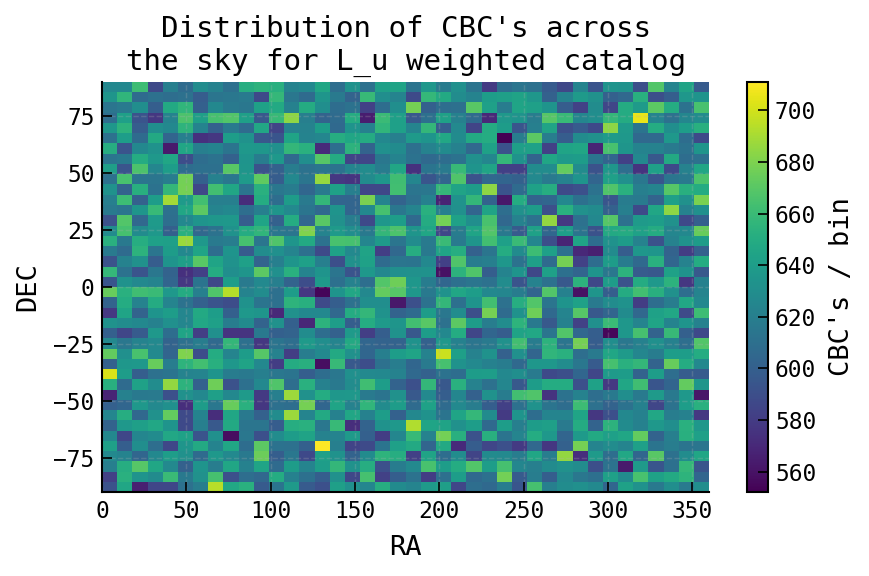

In [71]:
# Check distribution for mock_ra and mock_dec
h,yedges,xedges,img = plt.hist2d(x=cat_cbc_u['mra'], y=cat_cbc_u['mdec'], bins=40,); 
plt.xlim(0, 360)
plt.ylim(-90, 90)
cax = plt.colorbar(label="CBC's / bin")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("Distribution of CBC's across\nthe sky for L_u weighted catalog")

Text(0.5, 1.0, "Distribution of CBC's across\nthe sky for L_r mass weighted catalog")

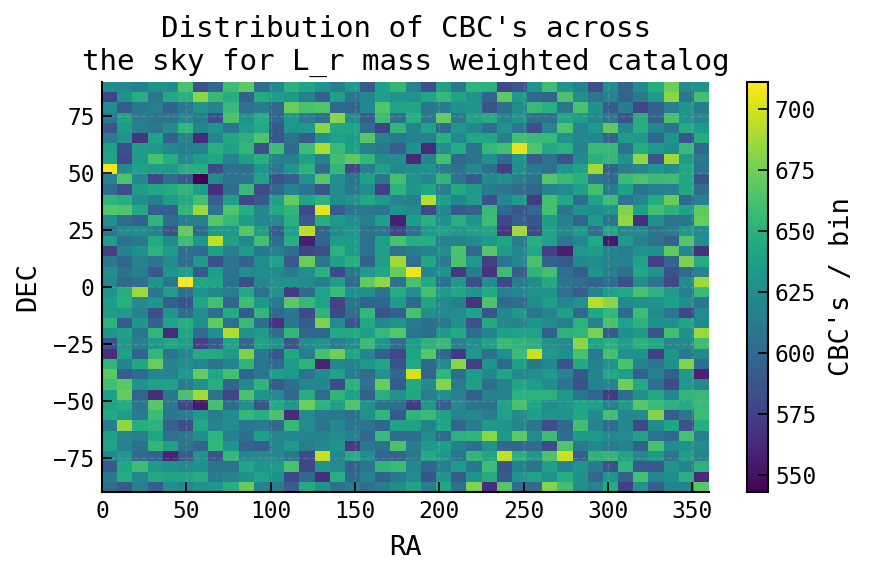

In [72]:
# Check distribution for mock_ra and mock_dec
h,yedges,xedges,img = plt.hist2d(x=cat_cbc_r['mra'], y=cat_cbc_r['mdec'], bins=40,); 
plt.xlim(0, 360)
plt.ylim(-90, 90)
cax = plt.colorbar(label="CBC's / bin")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("Distribution of CBC's across\nthe sky for L_r mass weighted catalog")

Text(0.5, 1.0, "Distribution of CBC's across\nthe sky for L_y weighted catalog")

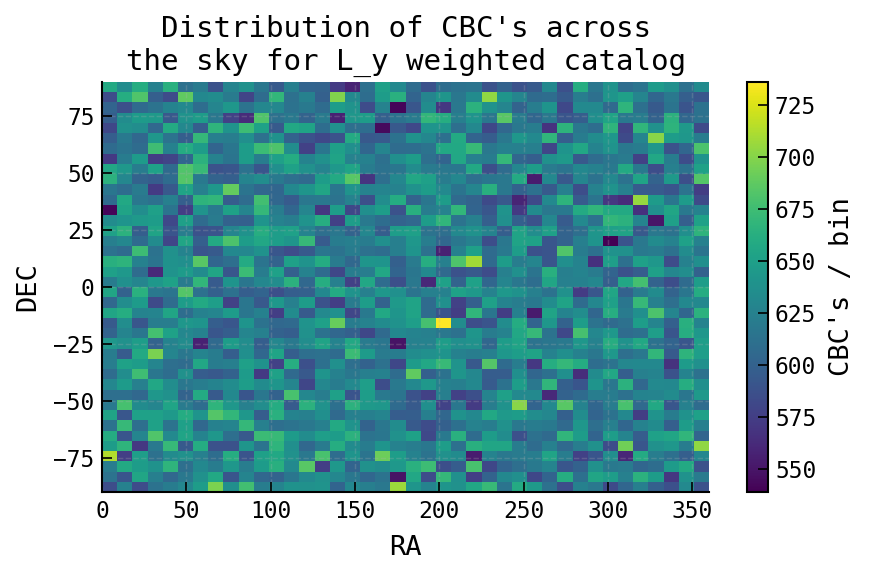

In [73]:
# Check distribution for mock_ra and mock_dec
h,yedges,xedges,img = plt.hist2d(x=cat_cbc_y['mra'], y=cat_cbc_y['mdec'], bins=40,); 
plt.xlim(0, 360)
plt.ylim(-90, 90)
cax = plt.colorbar(label="CBC's / bin")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("Distribution of CBC's across\nthe sky for L_y weighted catalog")

In [ ]:
plt.hist2d(cat_cbc_uniform['mdec'], cat_cbc_uniform['redshift'], bins=60, cmap='magma'); plt.colorbar(label="CBC count / bin")
plt.xlabel("CBC dec")
plt.ylabel("redshift")
plt.title("Uniform weighted catalog")

In [ ]:
plt.hist2d(cat_cbc_uniform['mra'], cat_cbc_uniform['redshift'], bins=60, cmap='magma'); plt.colorbar(label="CBC count / bin")
plt.xlabel("CBC ra")
plt.ylabel("redshift")
plt.title("Uniform weighted catalog")


In [ ]:
plt.hist2d(cat_cbc_massWeight['mdec'], cat_cbc_massWeight['redshift'], bins=60, cmap='magma'); plt.colorbar(label="CBC count / bin")
plt.xlabel("CBC dec")
plt.ylabel("redshift")
plt.title("Stellar-mass weighted catalog")

In [ ]:
plt.hist2d(cat_cbc_massWeight['mra'], cat_cbc_massWeight['redshift'], bins=60, cmap='magma'); plt.colorbar(label="CBC count / bin")
plt.xlabel("CBC ra")
plt.ylabel("redshift")
plt.title("Stellar-mass weighted catalog")

Text(0.5, 1.0, 'L_u weighted catalog')

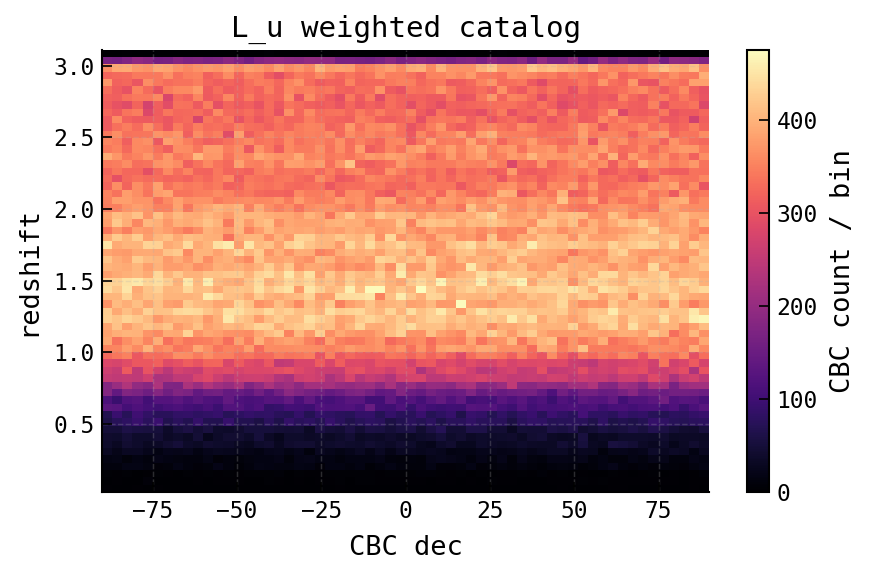

In [74]:
plt.hist2d(cat_cbc_u['mdec'], cat_cbc_u['redshift'], bins=60, cmap='magma'); plt.colorbar(label="CBC count / bin")
plt.xlabel("CBC dec")
plt.ylabel("redshift")
plt.title("L_u weighted catalog")

Text(0.5, 1.0, 'L_u weighted catalog')

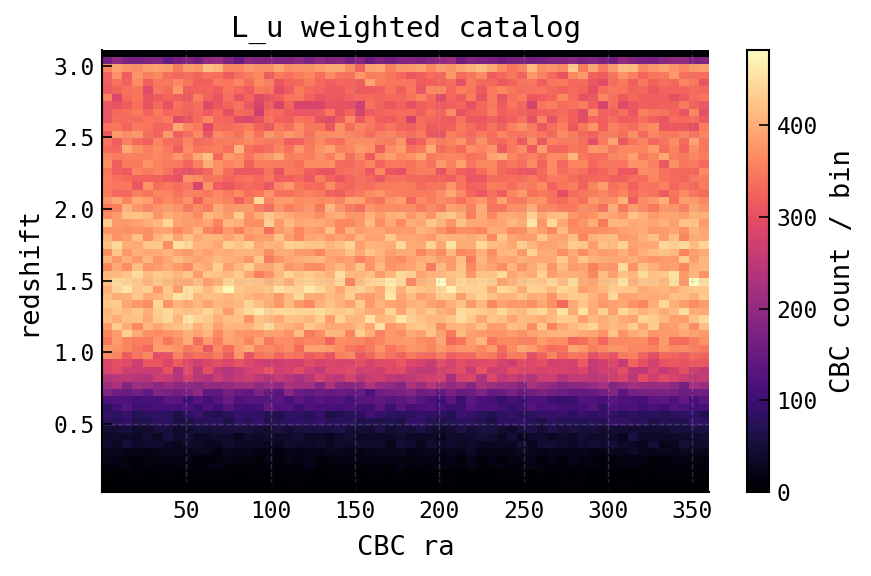

In [75]:
plt.hist2d(cat_cbc_u['mra'], cat_cbc_u['redshift'], bins=60, cmap='magma'); plt.colorbar(label="CBC count / bin")
plt.xlabel("CBC ra")
plt.ylabel("redshift")
plt.title("L_u weighted catalog")

Text(0.5, 1.0, 'L_r weighted catalog')

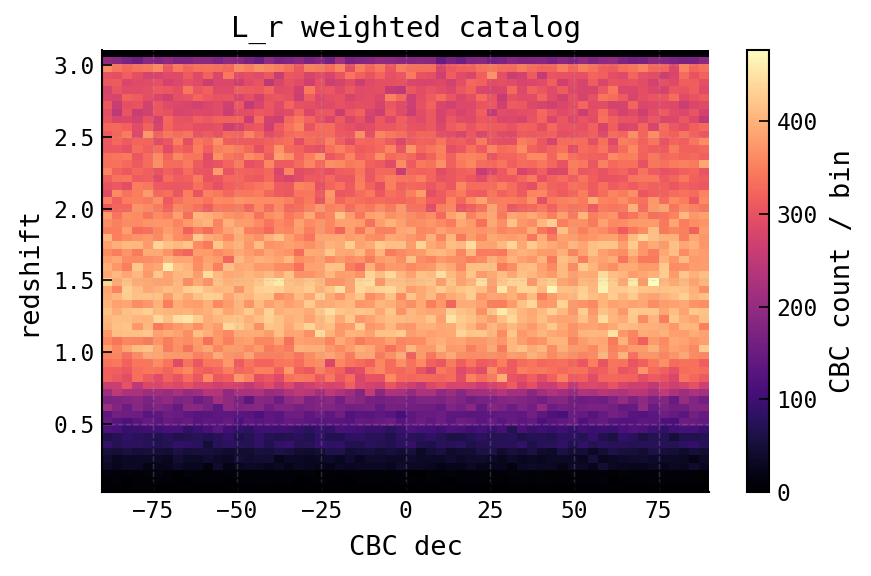

In [76]:
plt.hist2d(cat_cbc_r['mdec'], cat_cbc_r['redshift'], bins=60, cmap='magma'); plt.colorbar(label="CBC count / bin")
plt.xlabel("CBC dec")
plt.ylabel("redshift")
plt.title("L_r weighted catalog")

Text(0.5, 1.0, 'L_r weighted catalog')

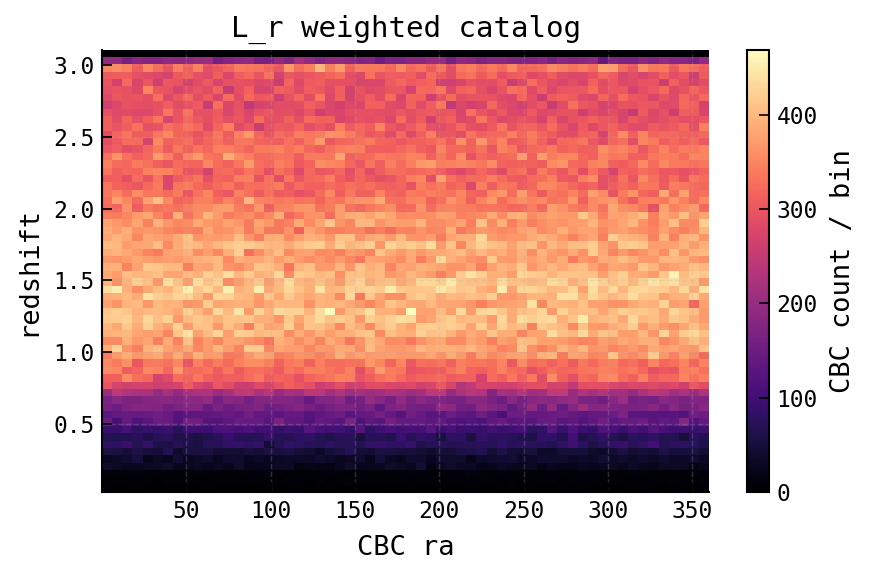

In [77]:
plt.hist2d(cat_cbc_r['mra'], cat_cbc_r['redshift'], bins=60, cmap='magma'); plt.colorbar(label="CBC count / bin")
plt.xlabel("CBC ra")
plt.ylabel("redshift")
plt.title("L_r weighted catalog")

Text(0.5, 1.0, 'L_y weighted catalog')

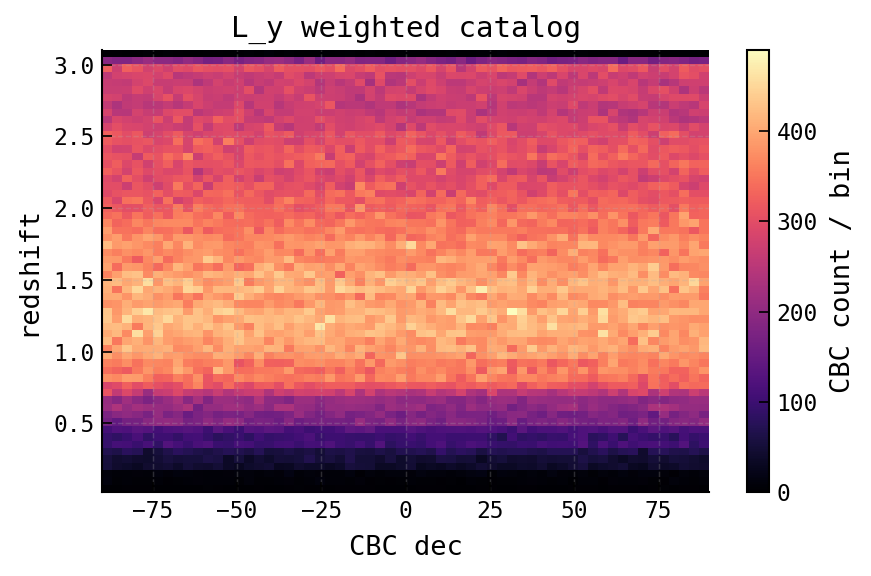

In [78]:
plt.hist2d(cat_cbc_y['mdec'], cat_cbc_y['redshift'], bins=60, cmap='magma'); plt.colorbar(label="CBC count / bin")
plt.xlabel("CBC dec")
plt.ylabel("redshift")
plt.title("L_y weighted catalog")

Text(0.5, 1.0, 'L_y weighted catalog')

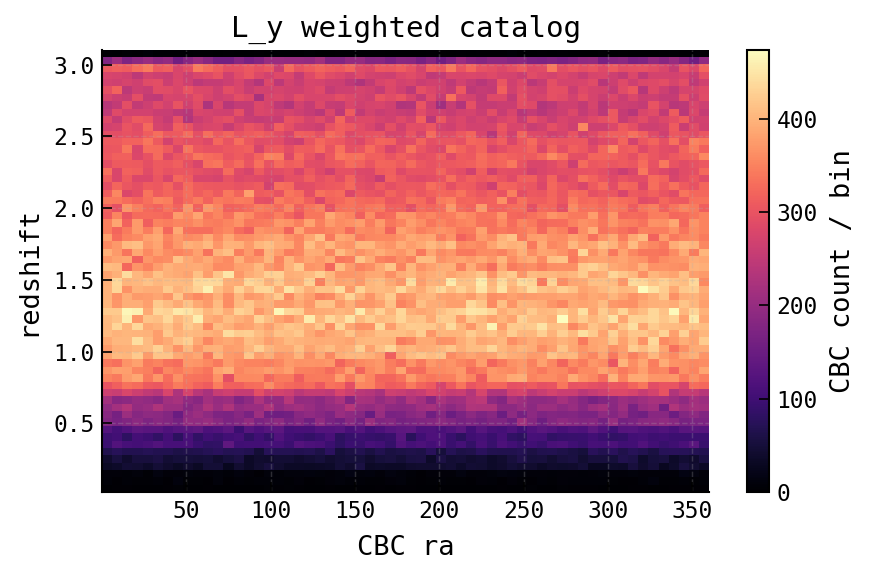

In [79]:
plt.hist2d(cat_cbc_y['mra'], cat_cbc_y['redshift'], bins=60, cmap='magma'); plt.colorbar(label="CBC count / bin")
plt.xlabel("CBC ra")
plt.ylabel("redshift")
plt.title("L_y weighted catalog")

In [80]:
import healpy as hp
NSIDE=32

def radecToIndex(RA, DEC, NSIDE=NSIDE):
    return hp.pixelfunc.ang2pix(NSIDE,np.radians(-DEC+90.),np.radians(360.-RA))

In [ ]:
%%time
hpindex = cat_cbc_uniform.apply(lambda x: radecToIndex(x["mra"], x["mdec"]), result_type='expand', axis=1)
thpindex = cat_cbc_uniform.apply(lambda x: radecToIndex(x["ra"], x["dec"]), result_type='expand', axis=1)

m16=np.zeros(hp.nside2npix(NSIDE))
t16=np.zeros(hp.nside2npix(NSIDE))

pixcounts = hpindex.value_counts()
tpixcounts = thpindex.value_counts()

m16[pixcounts.index] = pixcounts 
t16[tpixcounts.index] = tpixcounts 

hp.mollview(m16, min=40, max=150, cmap='magma')
plt.show()
plt.figure(figsize=(8,4))
hp.mollview(t16, cmap='magma', title='original')

In [ ]:
%%time
hpindex = cat_cbc_massWeight.apply(lambda x: radecToIndex(x["mra"], x["mdec"]), result_type='expand', axis=1)
thpindex = cat_cbc_massWeight.apply(lambda x: radecToIndex(x["ra"], x["dec"]), result_type='expand', axis=1)

m16=np.zeros(hp.nside2npix(NSIDE))
t16=np.zeros(hp.nside2npix(NSIDE))

pixcounts = hpindex.value_counts()
tpixcounts = thpindex.value_counts()

m16[pixcounts.index] = pixcounts 
t16[tpixcounts.index] = tpixcounts 

hp.mollview(m16, min=40, max=150, cmap='magma')
plt.show()
plt.figure(figsize=(8,4))
hp.mollview(t16, cmap='magma', title='original')

/opt/desc/py/lib/python3.12/site-packages/healpy/visufunc.py:332: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pylab.draw()
/opt/desc/py/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


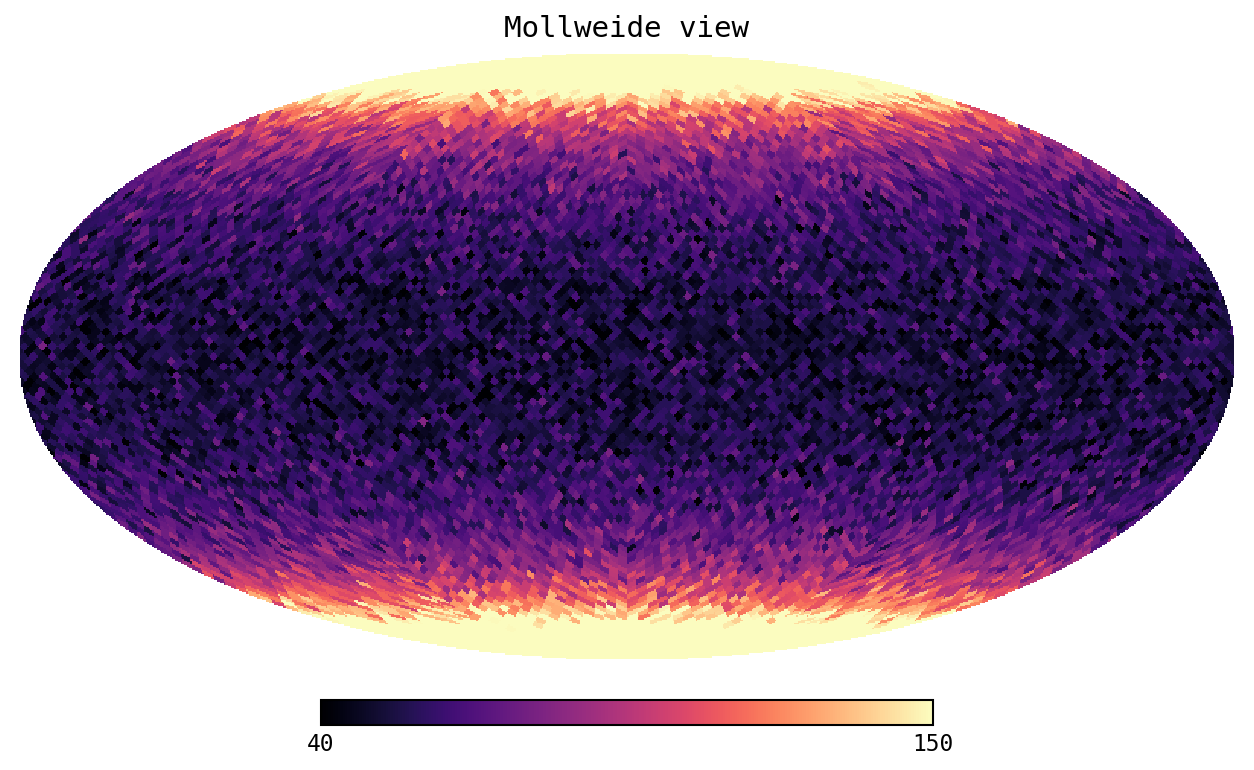

CPU times: user 47.8 s, sys: 1.13 s, total: 48.9 s
Wall time: 49.4 s


<Figure size 1200x600 with 0 Axes>

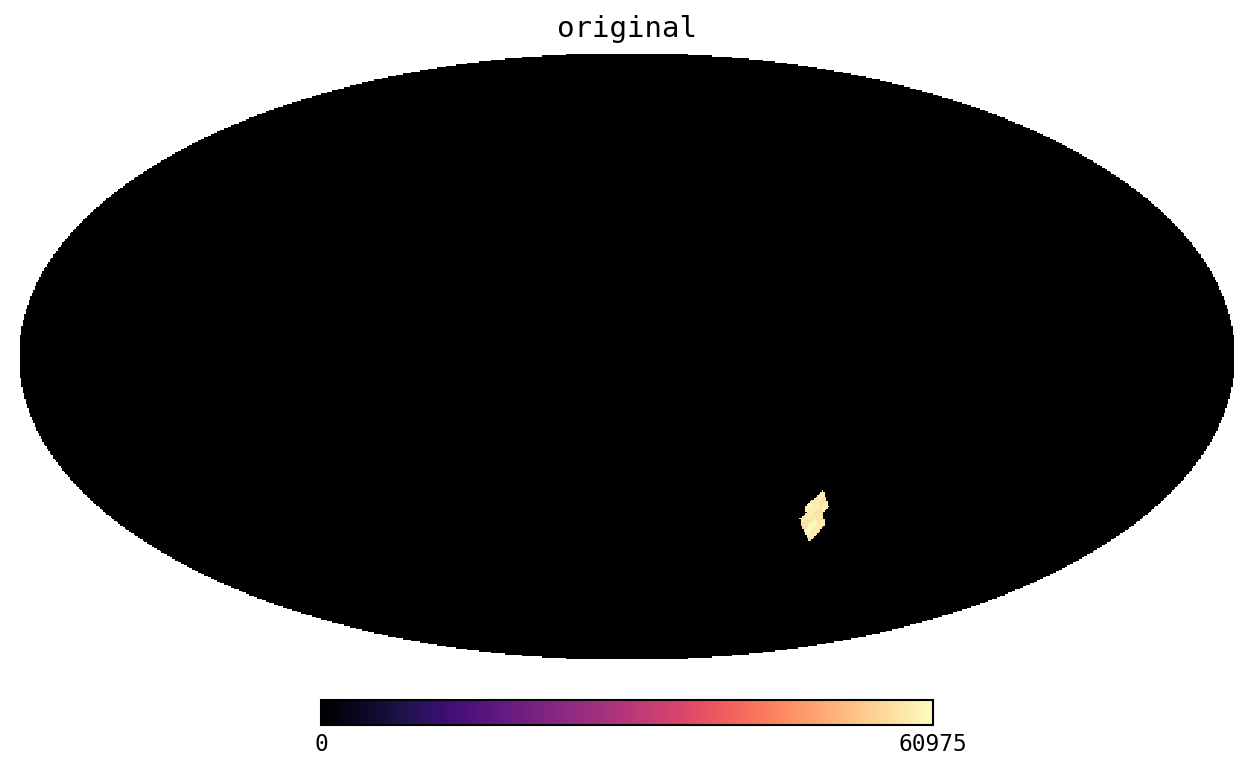

In [81]:
%%time
hpindex = cat_cbc_u.apply(lambda x: radecToIndex(x["mra"], x["mdec"]), result_type='expand', axis=1)
thpindex = cat_cbc_u.apply(lambda x: radecToIndex(x["ra"], x["dec"]), result_type='expand', axis=1)

m16=np.zeros(hp.nside2npix(NSIDE))
t16=np.zeros(hp.nside2npix(NSIDE))

pixcounts = hpindex.value_counts()
tpixcounts = thpindex.value_counts()

m16[pixcounts.index] = pixcounts 
t16[tpixcounts.index] = tpixcounts 

hp.mollview(m16, min=40, max=150, cmap='magma')
plt.show()
plt.figure(figsize=(8,4))
hp.mollview(t16, cmap='magma', title='original')

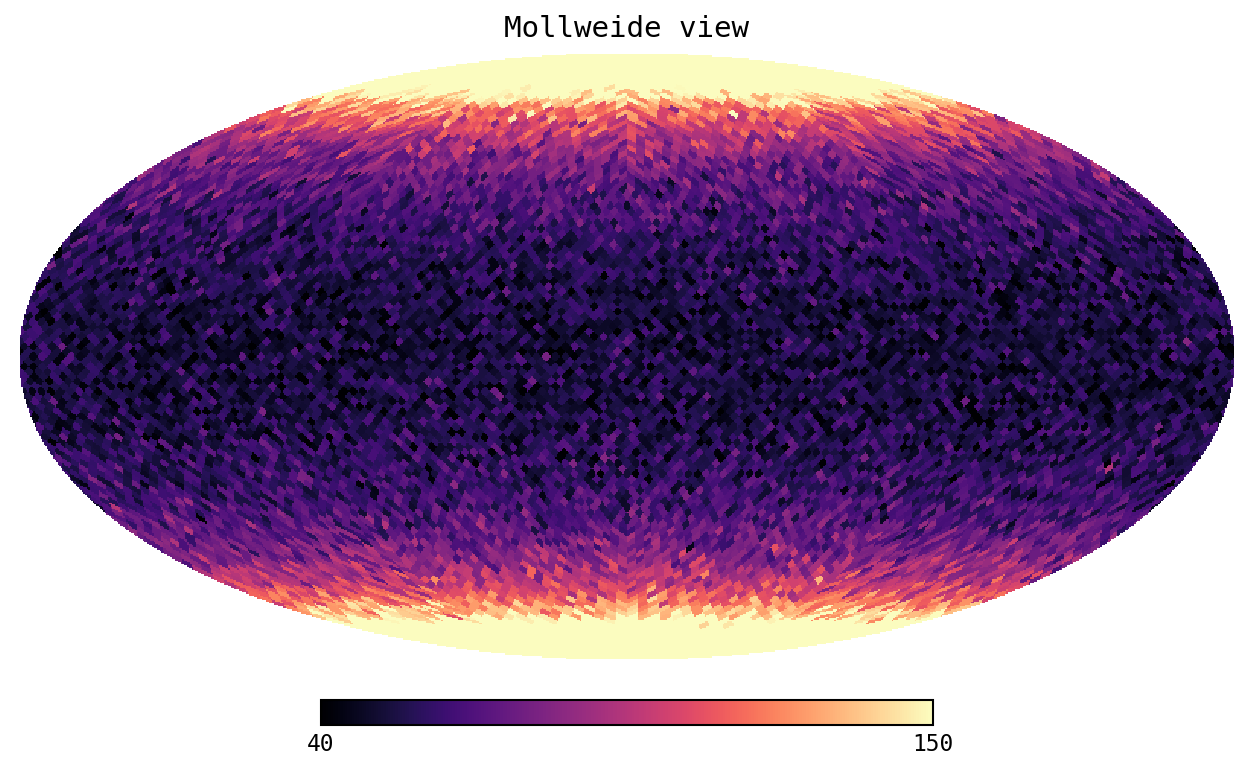

CPU times: user 48.4 s, sys: 1.28 s, total: 49.7 s
Wall time: 49.9 s


<Figure size 1200x600 with 0 Axes>

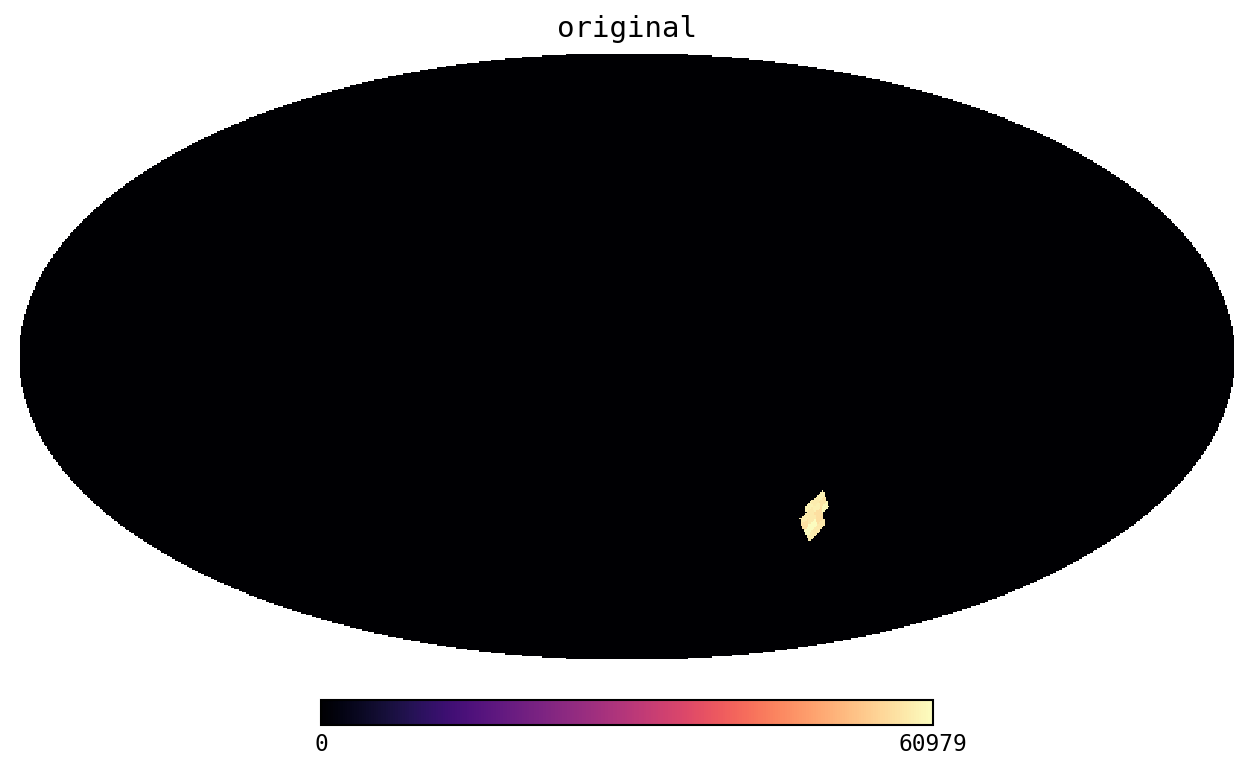

In [82]:
%%time
hpindex = cat_cbc_r.apply(lambda x: radecToIndex(x["mra"], x["mdec"]), result_type='expand', axis=1)
thpindex = cat_cbc_r.apply(lambda x: radecToIndex(x["ra"], x["dec"]), result_type='expand', axis=1)

m16=np.zeros(hp.nside2npix(NSIDE))
t16=np.zeros(hp.nside2npix(NSIDE))

pixcounts = hpindex.value_counts()
tpixcounts = thpindex.value_counts()

m16[pixcounts.index] = pixcounts 
t16[tpixcounts.index] = tpixcounts 

hp.mollview(m16, min=40, max=150, cmap='magma')
plt.show()
plt.figure(figsize=(8,4))
hp.mollview(t16, cmap='magma', title='original')

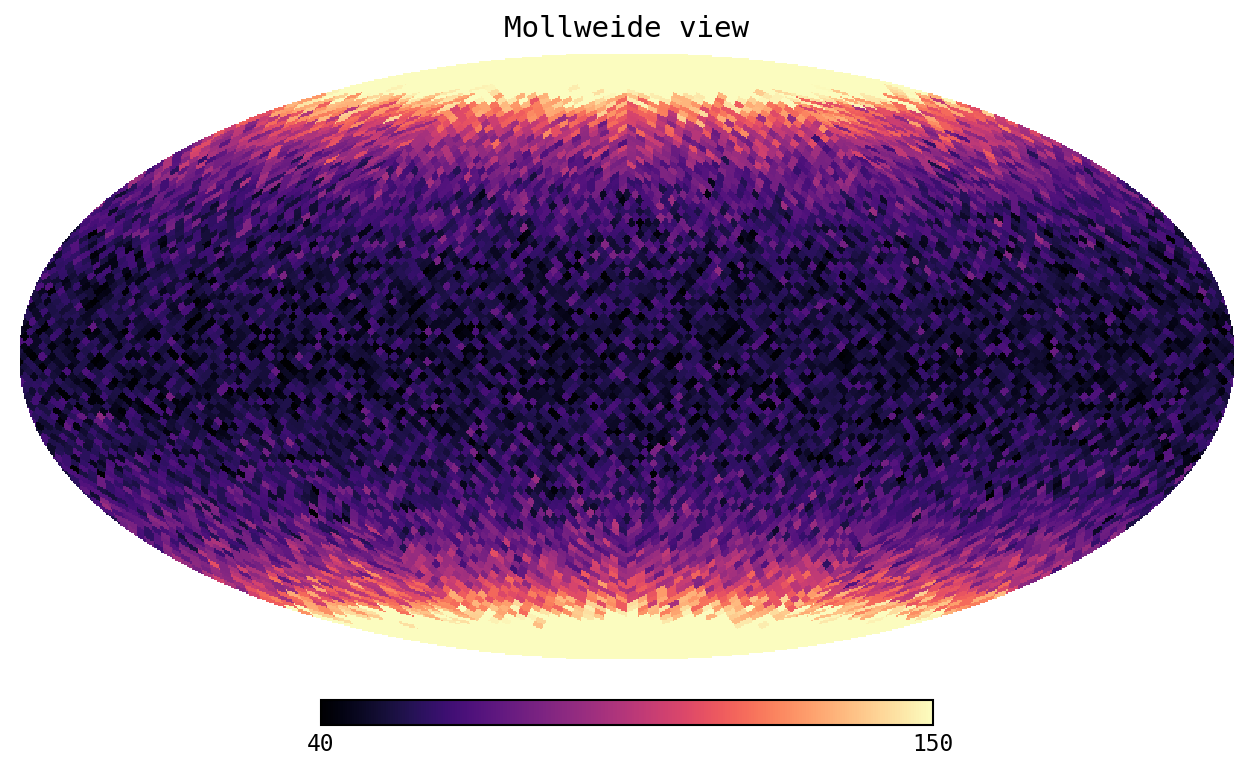

CPU times: user 48.3 s, sys: 1.17 s, total: 49.5 s
Wall time: 49.7 s


<Figure size 1200x600 with 0 Axes>

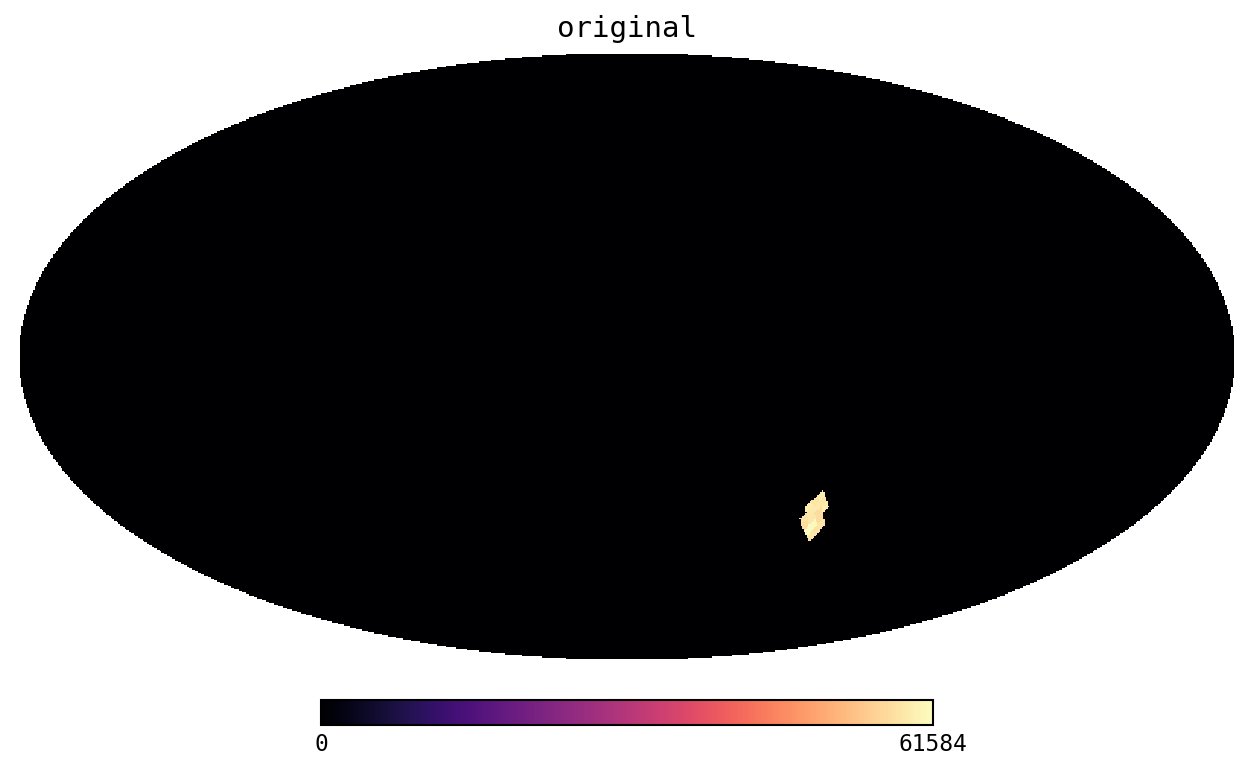

In [83]:
%%time
hpindex = cat_cbc_y.apply(lambda x: radecToIndex(x["mra"], x["mdec"]), result_type='expand', axis=1)
thpindex = cat_cbc_y.apply(lambda x: radecToIndex(x["ra"], x["dec"]), result_type='expand', axis=1)

m16=np.zeros(hp.nside2npix(NSIDE))
t16=np.zeros(hp.nside2npix(NSIDE))

pixcounts = hpindex.value_counts()
tpixcounts = thpindex.value_counts()

m16[pixcounts.index] = pixcounts 
t16[tpixcounts.index] = tpixcounts 

hp.mollview(m16, min=40, max=150, cmap='magma')
plt.show()
plt.figure(figsize=(8,4))
hp.mollview(t16, cmap='magma', title='original')

In [ ]:
np.nanpercentile(pixcounts,(1,50,99)),np.nanpercentile(tpixcounts,(1,50,99))